# Data Visualization: Pie Chart, Bar plot 

#### Objectives:
- Familiarity with matplotlib and seaborn
- Data Analysis using NumPy and Pandas
- How to find the number of unique values present in the DataFrame?
- How to rename a column name is pandas DataFrame?
- How to round the numeric values in a pandas column?
- How to change the index of a DataFrame?
- Data Visualization: Pie Chart, Bar plot
- How to set a title, xlabel and ylabel of a plot?
- How to change the range of x and y axis?
- How to rotate the x and y tick labels?

#### Datasets:
- 100,000 UK Used Car Data set


### Import required libraries and packages

In [1]:
# import required libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Read a csv file as pandas DataFrame

In [2]:
df_toyota = pd.read_csv("/content/toyota.csv")

display(df_toyota.head())

print("\nSummary of Toyota DataFrame:\n")
df_toyota.info()

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0



Summary of Toyota DataFrame:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   mpg           6738 non-null   float64
 7   engineSize    6738 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 421.2+ KB


## Create a Pie Chart for the 'transmission' column

### Count the number of unique values present in the 'transmission' column

In [3]:
print(df_toyota["transmission"].value_counts())

Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: transmission, dtype: int64


### Draw Pie Chart

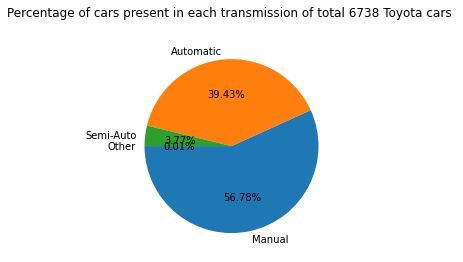

In [4]:
df_toyota["transmission"].value_counts().plot(kind="pie", 
                                       autopct='%1.2f%%', 
                                       startangle=180)
plt.ylabel("")
plt.title("Percentage of cars present in each transmission of total {} Toyota cars \n".format(df_toyota.shape[0]))
plt.show()

## Create a Barplot for the 'transmission' column

### Find the percentage of unique values present in the 'transmission' column

In [5]:
df_transmission = pd.DataFrame(df_toyota["transmission"].value_counts())
df_transmission = df_transmission.reset_index()
df_transmission = df_transmission.rename(columns={"index":"transmission",
                                          "transmission":"no of cars"})

df_transmission["% of cars"] = (df_transmission["no of cars"]/df_toyota.shape[0]) * 100

df_transmission = df_transmission.round(2)

display(df_transmission)

,transmission,no of cars,% of cars
0,Manual,3826,56.78
1,Automatic,2657,39.43
2,Semi-Auto,254,3.77
3,Other,1,0.01


### Draw Barplot

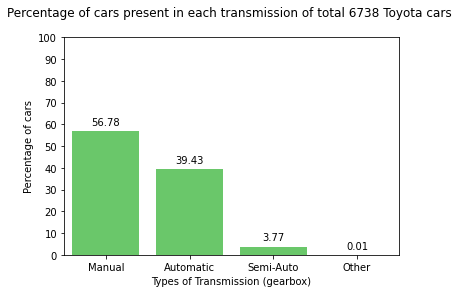

In [6]:
splot = sns.barplot(x="transmission", 
            y="% of cars", 
            data=df_transmission, 
            color="limegreen",
            alpha=0.8)
for p in splot.patches:
  splot.annotate(format(p.get_height(), '.2f'), 
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha = 'center', va = 'center', 
                 xytext = (0, 9),
                 textcoords = 'offset points')

plt.xlabel("Types of Transmission (gearbox)")
plt.ylabel("Percentage of cars")
plt.title("Percentage of cars present in each transmission of total {} Toyota cars \n".format(df_toyota.shape[0]))

plt.yticks(np.arange(0,101,10))
plt.show()

## Comparision between Pie Chart and Barplot

Pie charts are best to use when we are trying to compare 2/3 parts of a whole where all the parts should not have value close to zero. There are four unique values for the 'transmission' column where Other's count is the smallest 1. So the pie chart visualization is not looking good as the 'Other' gearbox doesn't have any significant area portion and the label is overlapping with 'Semi-Auto'. This is problematic, however, the bar graphs are best when the changes are larger. The 'Manual' gearbox has the highest height with 56.78% and the 'Other' gearbox has the lowest height with 0.01% area portion. the barplot is looking good for this data representation.